In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

input_path = "../data/processed_amazon_products.csv"
output_dir = "../reports/regression"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(input_path)
print("data loaded", df.shape)
df.head()


# define features and targets
features = ["rating", "number_of_reviews", "current/discounted_price", "listed_price", "discount", "is_best_seller", "is_couponed", "is_sponsored"]
target = "bought_in_last_month"

# dropna
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train shape:", X_train.shape, "test shape:", X_test.shape)




data loaded (42675, 21)
train shape: (34140, 8) test shape: (8535, 8)


1. Target Variable = bought_in_last_month → numeric sales performance

2. Features
- rating
- number_of_reviews
- current/discounted_price
- listed_price
- discount
- is_best_seller
- is_couponed
- is_sponsored

3. Models to Train
- Linear Regression (baseline)
- Random Forest Regressor (tree-based)
- XGBoost Regressor (boosting)

4. Metrics
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score




In [ ]:
import joblib

# train evaluate models
results = {}

# Linear Regression (baseline)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

results["Linear Regression"] = {
    "RMSE": np.sqrt(mse),  
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred)
}
joblib.dump(linreg, f"{output_dir}/linear_regression.pkl")

# Random Forest 
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
results["Random Forest"] = {
    "RMSE": np.sqrt(mse),  
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred)
}
joblib.dump(rf, f"{output_dir}/random_forest.pkl")

# XGBoost 
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
results["XGBoost"] = {
    "RMSE": np.sqrt(mse),  
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred)
}
joblib.dump(xgb, f"{output_dir}/xgboost.pkl")



['../reports/regression/xgboost.pkl']

In [11]:
# save display results

# convert result to dataframe
results_df = pd.DataFrame(results).T
results_df.to_csv(f"{output_dir}/regression_metrics.csv")

print("Regression models trained and results saved")
display(results_df)

Regression models trained and results saved


,RMSE,MAE,R2
Linear Regression,5.209498e+12,7.003289e+10,-0.000031
Random Forest,5.224177e+12,6.061928e+10,-0.005675
XGBoost,5.209722e+12,5.641546e+10,-0.000117


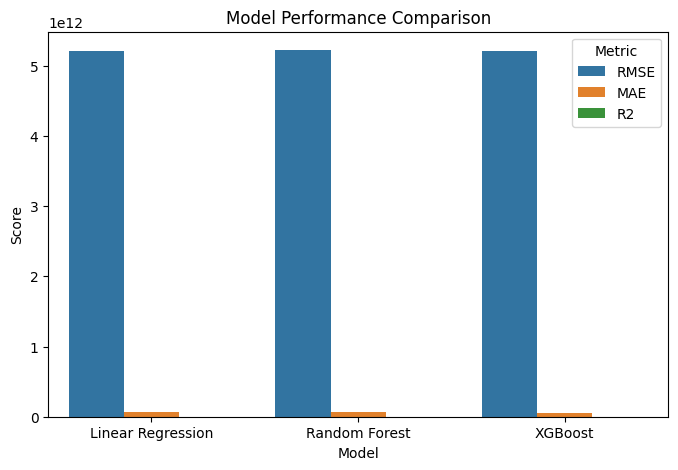

In [12]:
# Barplot comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.reset_index().melt(id_vars="index"), x="index", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.savefig(f"{output_dir}/regression_comparison.png", dpi=300, bbox_inches="tight")
plt.show()